In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

Load and Visualise dataset

1. Load

2. Normalise

3. Visualise

In [2]:
#Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv').values
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv').values

In [3]:
#Normalise
X = (X - X.mean())/X.std()

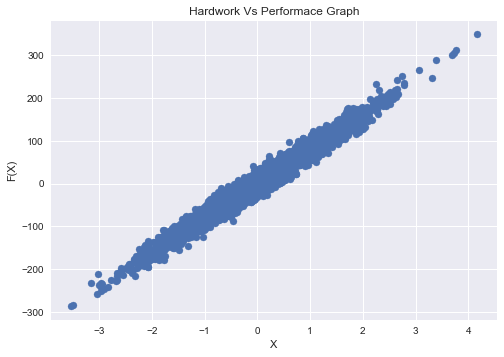

In [4]:
#Visualise

plt.style.use('seaborn')
plt.scatter(X, Y)
plt.title('Hardwork Vs Performace Graph')
plt.xlabel('X')
plt.ylabel('F(X)')
plt.show()

Linear Regression

In [5]:
def hypothesis(x, theta):
    return theta[0] + theta[1] * x

In [6]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2, ))

    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x, theta)
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x

    return grad / m

In [7]:
def error(X, Y, theta):
    m = X.shape[0]
    totalError = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        totalError += (y_ - Y[i])**2

    return totalError / m

In [30]:
def gradientDescent(X, Y, maxSteps = 100, learningRate = 0.1):
    theta = np.zeros((2, ))
    errorList = []
    thetaList = []

    for i in range(maxSteps):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        errorList.append(e)

        theta[0] = theta[0] - learningRate * grad[0]
        theta[1] = theta[1] - learningRate * grad[1]
        thetaList.append((theta[0], theta[1]))
    return theta, errorList, thetaList

In [31]:
theta, errorList, thetaList = gradientDescent(X, Y)

In [32]:
print(theta)

[ 0.6838508  79.90361453]


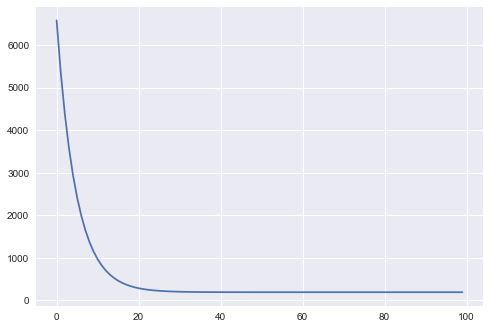

In [11]:
plt.plot(errorList)
plt.show()

Prediction and Best Fit Line

In [12]:
y_ = hypothesis(X, theta)

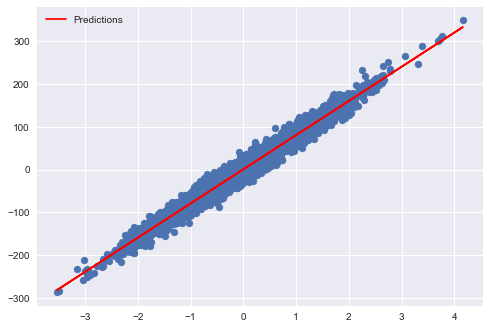

In [13]:
plt.scatter(X, Y)
plt.plot(X, y_, color = 'red', label = 'Predictions')
plt.legend()
plt.show()

In [14]:
xTest = pd.read_csv('./Test Cases/Linear_X_Test.csv').values

In [15]:
yPredict = hypothesis(xTest, theta)

In [16]:
df = pd.DataFrame(data= yPredict, columns= ['y'])

In [17]:
df.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


In [18]:
df.to_csv('yPredictions.csv', index = False)

Computing Score

Score : R2 (R-Squared) or Coefficient of Determination

In [20]:
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = 1 - num/denom

    return score*100

In [21]:
r2_score(Y, y_)

97.09612226971643

Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Loss Actually 
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]

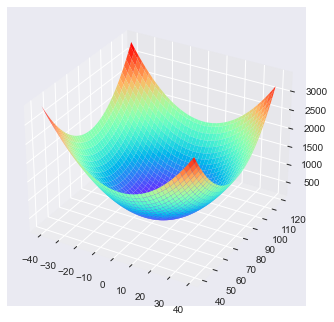

In [26]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

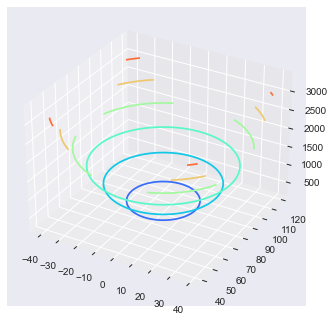

In [27]:
# Contour Plot 
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

Plot the changes in values of theta

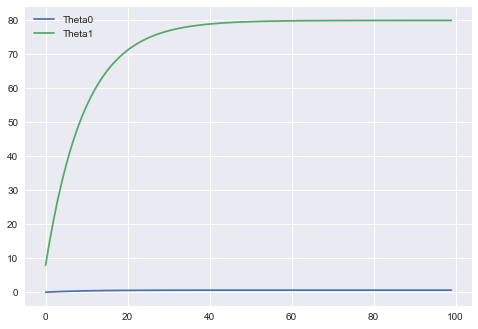

In [34]:
thetaList = np.array(thetaList)
plt.plot(thetaList[:,0],label="Theta0")
plt.plot(thetaList[:,1],label="Theta1")
plt.legend()
plt.show()

Trajectory traced by Theta Updates in the Loss Function

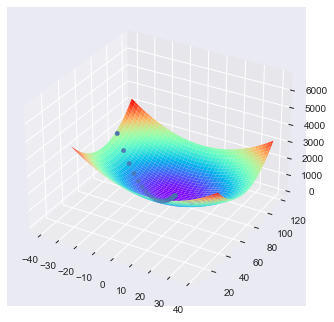

In [35]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(thetaList[:,0],thetaList[:,1],errorList)
plt.show()

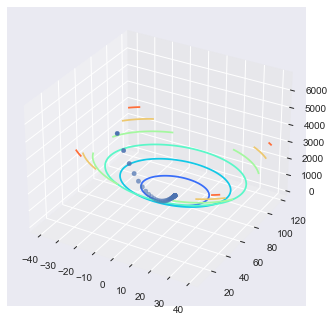

In [36]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(thetaList[:,0],thetaList[:,1],errorList)
plt.show()

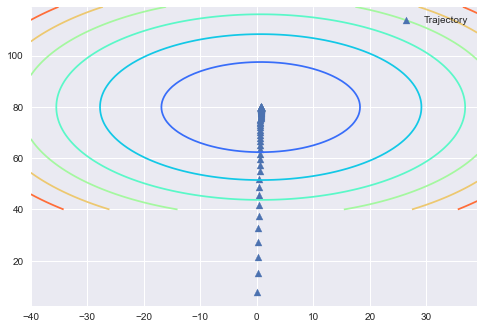

In [38]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(thetaList[:,0],thetaList[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()

In [39]:
# Save the data in file

thetaList
np.save("ThetaList.npy",thetaList)